In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import scipy.stats as st
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
print(df.dtypes)

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


### Data Visualization

<AxesSubplot:xlabel='class', ylabel='count'>

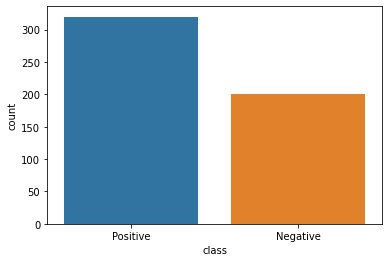

In [5]:
#visualization of Diabetes Distribution

sn.countplot(x='class', data = df)

In [8]:
#creating positive class 
pos_df = df[df['class'] == 'Positive']

<AxesSubplot:xlabel='Gender', ylabel='count'>

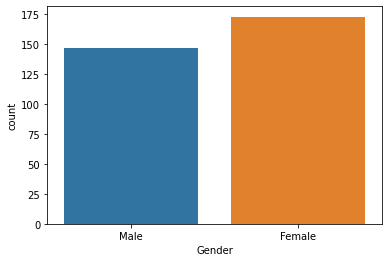

In [9]:
#Gender Distribution of postive classes
sn.countplot(x= pos_df.Gender, data = pos_df)

In [41]:
df1 = pd.get_dummies(df, drop_first = True)

In [46]:
df1.head(5)

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [43]:
data_corrs = df1.corr()['class_Positive'].map(abs).sort_values(ascending = False)
data_corrs

class_Positive            1.000000
Polyuria_Yes              0.665922
Polydipsia_Yes            0.648734
Gender_Male               0.449233
sudden weight loss_Yes    0.436568
partial paresis_Yes       0.432288
Polyphagia_Yes            0.342504
Irritability_Yes          0.299467
Alopecia_Yes              0.267512
visual blurring_Yes       0.251300
weakness_Yes              0.243275
muscle stiffness_Yes      0.122474
Genital thrush_Yes        0.110288
Age                       0.108679
Obesity_Yes               0.072173
delayed healing_Yes       0.046980
Itching_Yes               0.013384
Name: class_Positive, dtype: float64

<AxesSubplot:>

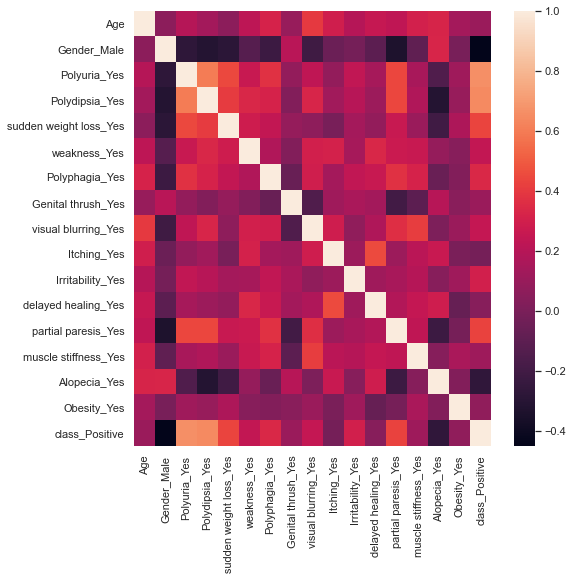

In [45]:
#seaborn heatmap, to visualize correlation
sn.set(rc= {'figure.figsize':(8,8)})
sn.heatmap(df1.corr())

### Identify X & Y, and Logistic Regression using Statsmodels
Prior to running and building our machine learning models, need to look at correlation with our target variable. We do so by looking at the P-value of the coefficients. A P value <= 0.05 has statistical significance.

Logistic regression is the type of regression analysis used to find the probability of a certain event occurring. It is the best suited type of regression for cases where we have a categorical dependent variable which can take only discrete values.


Second we identify are our target (Y) and response variables (X).

The add_constant = 

In [53]:
from statsmodels.tools import add_constant as add_constant

In [49]:
#Identifying Y(target) and X (Response Variables)
y = df1['class_Positive']
X = df1.drop('class_Positive', axis = 1)

In [50]:
import statsmodels.api as sm
# Creating intercept term required for sm.Logit
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

#results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [51]:
result.summary()

/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         class_Positive   No. Observations:                  520
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                           16
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                     inf
Time:                        20:21:53   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.7466      1.075      2.554      0.011       0.639       4.854
Age                       -0.0512      0.025     -2.017      0.044      -0.101      -0.001
Gender_Male               -4.3512      0.598     -7.274      0.000      -5.524      -3.179
Polyuria_Yes               4.4395      0.705      6.295      0.000       3.057       5.822
Polydipsia_Yes             5.0704      0.829      6.117      0.000       3.446       6.695
sudden weight loss_Yes     0.1903      0.548      0.348      0.728      -0.883       1.264
weakness_Yes               0.8171      0.537      1.522      0.128      -0.235       1.869
Polyphagia_Yes             1.1938      0.534      2.238      0.025       0.148       2.239
Genital thrush_Yes         1.8637      0.553      3.368      0.001       0.779       2.948
visual blurring_Yes        0.9159      0.651      1.406      0.160      -0.360       2.192
Itching_Yes               -2.8029      0.673     -4.167      0.000      -4.121      -1.485
Irritability_Yes           2.3407      0.591      3.964      0.000       1.183       3.498
delayed healing_Yes       -0.3916      0.550     -0.712      0.476      -1.470       0.686
partial paresis_Yes        1.1593      0.525      2.209      0.027       0.131       2.188
muscle stiffness_Yes      -0.7288      0.580     -1.256      0.209      -1.866       0.408
Alopecia_Yes               0.1504      0.620      0.242      0.808      -1.065       1.366
Obesity_Yes               -0.2890      0.544     -0.531      0.595      -1.356       0.778
==========================================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Selecting columns that have significant p <=0.05
These variables will be selected, as they have a P-Value P<= 0.05. The rest have no statistical significance with target variable

In [59]:
cols = ['Age', 'Gender_Male', 'Polyuria_Yes','Polydipsia_Yes', 'Polyphagia_Yes', 'Genital thrush_Yes',
       'Itching_Yes', 'Irritability_Yes', 'partial paresis_Yes']

### Re-running Logistic Regression Model, this time to look at Odds Ratio

In [61]:
y = df1['class_Positive']
X = df1[cols]

# Creating intercept term required for sm.Logit
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

#results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


### Odds Ratio
In logistic regression the odds ratio represents the constant effect of a predictor X, on the likelihood that one outcome will occur.

Odds ratios (OR) are used to compare the relative odds of the occurrence of the outcome of interest, given exposure to the variable of interest. The odds ratio can also be used to determine whether a particular exposure is a risk factor for a particular outcome.

**OR=1** Exposure does not affect odds of outcome

**OR>1** Exposure associated with higher odds of outcome

**OR<1** Exposure associated with lower odds of outcome

In [62]:
#Statistical information regarding confidence intervals, P-values and Odds Ration
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                     CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                    3.104935     119.452825   19.258589   0.001
Age                      0.913527       0.991045    0.951497   0.017
Gender_Male              0.003785       0.036593    0.011769   0.000
Polyuria_Yes            19.809786     200.305053   62.992066   0.000
Polydipsia_Yes          41.476452     744.445256  175.718376   0.000
Polyphagia_Yes           1.308163       8.150403    3.265281   0.011
Genital thrush_Yes       2.137282      14.695090    5.604245   0.000
Itching_Yes              0.035547       0.266386    0.097310   0.000
Irritability_Yes         3.748737      28.907751   10.409974   0.000
partial paresis_Yes      1.457535       8.897671    3.601203   0.005


### Interpreting Odds Ratio
Patients with **Polyuria** are 62  times likely to be diabetic.

Patients with **Polydipsia** are 175 times more likely to be diabetic

Patients with **Polyphagia** are 3 times more likely to be diabetic

Patients with **Genital thrush** are 5 times more likely to be diabetic

Patients with **irritability** are 10 times more likely to be diabetic

Patients with **partial paresis** are 3 times more likely to be diabetic

Patients with **Ithching** alone are 3% less likely to be a diabetic indicator.

Patients **Age** alone are 5% less likely to be a diabetic indicator.

Patients **Gender** 99% less likely alone to be an indicator for a diabetes


### Prepping for The Machine Learning Models
First, we identify our 'Y', in which case is 'class_Positive' and our 'X' will be the columns who had strong statistical relevance with our target variable 'Y', as I discussed above.

Also using value counts, I wanted to look at class distribution of of the class_Positive. That is what 'value_counts' provides.

By setting 'normalize=True' , the object returned will contain the relative frequencies of the unique values.


In [64]:
y = df1['class_Positive']
X = df1[cols]


# Class distribution - Pre-SMOTE
print('Original class distribution: \n')
print(y.value_counts())
print(y.value_counts(normalize = True))

Original class distribution: 

1    320
0    200
Name: class_Positive, dtype: int64
1    0.615385
0    0.384615
Name: class_Positive, dtype: float64


### Train Test Split
Train Test Split here splits the data into test sets and train sets. We set the test size to 0.25, or 25% of the data.

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

### SMOTE: Synthetic Minority Over-sampling Technique
Because 61% of our data was 'positive' and 38% was 'negative', there is a large class imbalance. This will be fixed using SMOTE

SMOTE stands for **Synthetic Minority Oversampling**. Here, rather then simply oversampling the minority class with replacement (which simply adds duplicate cases to the dataset), the algorithm generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases.



In [68]:
smote = SMOTE(random_state = 777)
X_train, y_train = smote.fit_sample(X_train, y_train)

# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(y_train.value_counts())

-----------------------------------------
Synthetic sample class distribution: 

0    238
1    238
Name: class_Positive, dtype: int64


#### LOGISTIC REGRESSION
Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables.

First starting out, we will instantiate the model.

Next we set the paramerters for grid searchCV. Here we are using Solver, which is an algorithm used in the optimization problem. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones. Another parameter is penalty, which specifies the norm of the penalty,None: no penalty is added, l2: l2 penalty added, and l1: l1 penalty is added, and elasticnet: both l1 and l2 penalty are added.


Then we use GridsearchCV. GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

we fit the data, and then use **.best_params_** which tells use the best parameters for our model. Lastly given the parameters to use, we Instantiate them model with set parameters.

In [69]:
log_clf = LogisticRegression()

In [71]:
#Parameters for GridSearchCV
log_grid = {'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
           'penalty': ['l1', 'l2', 'None', 'elasticnet']}

In [72]:
log = GridSearchCV(log_clf, log_grid, scoring = 'accuracy', cv = 3)

In [73]:
log.fit(X_train, y_train)

/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosmarin/o

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'None', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [75]:
log.best_params_

{'penalty': 'l2', 'solver': 'lbfgs'}

In [77]:
log = LogisticRegression(penalty = 'l2', solver = 'lbfgs', random_state = 777)

In [79]:
log.fit(X,y)

LogisticRegression(random_state=777)

In [80]:
log_predict = log.predict(X_test)